# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [37]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [7]:
# Mount Google Drive
drive.mount('/content/drive')

# Load the data into a Pandas DataFrame
file_path = '/content/drive/MyDrive/ExtraaLearn.csv'
df = pd.read_csv(file_path, delimiter=',')

# Display the first few rows of the DataFrame to ensure it's loaded correctly
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


## Data Overview

- Observations
- Sanity checks

### Observations

In [8]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
display(df.head())

# Get summary statistics
print("\nSummary statistics:")
display(df.describe())

# Get information about data types and null values
print("\nInformation about data types and null values:")
print(df.info())

First few rows of the DataFrame:


,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0



Summary statistics:


,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000



Information about data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status   

#### Data Overview: Observations

#### Summary Statistics

The dataset contains 4612 records with the following features: 'ID', 'age', 'current_occupation', 'first_interaction', 'profile_completed', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral', and 'status'.

Key summary statistics for numerical features are as follows:

- **Age**:
  - Range: 18 to 63 years
  - Mean: 46.2 years
  - Standard Deviation: 13.16

- **Website Visits**:
  - Range: 0 to 30 visits
  - Mean: 3.57 visits
  - Standard Deviation: 2.83

- **Time Spent on Website**:
  - Range: 0 to 2537 minutes
  - Mean: 724 minutes
  - Standard Deviation: 743.83

- **Page Views Per Visit**:
  - Range: 0 to 18.43 views
  - Mean: 3.03 views
  - Standard Deviation: 1.97

- **Status**:
  - Mean: 0.30
  - Standard Deviation: 0.46

##### Data Types and Null Values

- All features have non-null values, indicating that the dataset is complete.
- Data types are appropriate for each feature, with 4 integer types, 1 float type, and 10 object types.
- The dataset consumes approximately 540.6 KB of memory.

##### Conclusion

The dataset is well-structured, complete, and free from null values. Summary statistics provide valuable insights into the distribution and characteristics of the numerical features. The dataset is ready for further exploration and model training.


### Sanity Checks

In [9]:
# Check for any negative ages
print("\nNegative ages:")
print(df[df['age'] < 0])

# Check for any invalid 'profile_completed' categories
valid_profile_categories = ['Low', 'Medium', 'High']
print("\nInvalid profile completion categories:")
print(df[~df['profile_completed'].isin(valid_profile_categories)])

# Check for any negative website visits
print("\nNegative website visits:")
print(df[df['website_visits'] < 0])

# Check for any negative time spent on website
print("\nNegative time spent on website:")
print(df[df['time_spent_on_website'] < 0])

# Check for any negative page views per visit
print("\nNegative page views per visit:")
print(df[df['page_views_per_visit'] < 0])


Negative ages:
Empty DataFrame
Columns: [ID, age, current_occupation, first_interaction, profile_completed, website_visits, time_spent_on_website, page_views_per_visit, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral, status]
Index: []

Invalid profile completion categories:
Empty DataFrame
Columns: [ID, age, current_occupation, first_interaction, profile_completed, website_visits, time_spent_on_website, page_views_per_visit, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral, status]
Index: []

Negative website visits:
Empty DataFrame
Columns: [ID, age, current_occupation, first_interaction, profile_completed, website_visits, time_spent_on_website, page_views_per_visit, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral, status]
Index: []

Negative time spent on website:
Empty DataFrame
Columns: [ID, age, current_occupation, first_interact

#### Sanity Check Results

After conducting a series of sanity checks on the dataset, the following observations were made:

1. **Negative Ages**: No records were found with negative age values, indicating that the 'age' feature is consistent and valid.
  
2. **Invalid Profile Completion Categories**: All records have valid 'profile_completed' categories ('Low', 'Medium', 'High'), confirming the integrity of this feature.

3. **Negative Website Visits**: No records were found with negative website visits, suggesting that the 'website_visits' feature is accurate and reliable.

4. **Negative Time Spent on Website**: No records were found with negative time spent on the website, ensuring the validity of the 'time_spent_on_website' feature.

5. **Negative Page Views Per Visit**: No records were found with negative page views per visit, affirming the quality of the 'page_views_per_visit' feature.

In summary, the dataset passed all sanity checks, indicating that it is clean, consistent, and ready for further analysis or model training.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

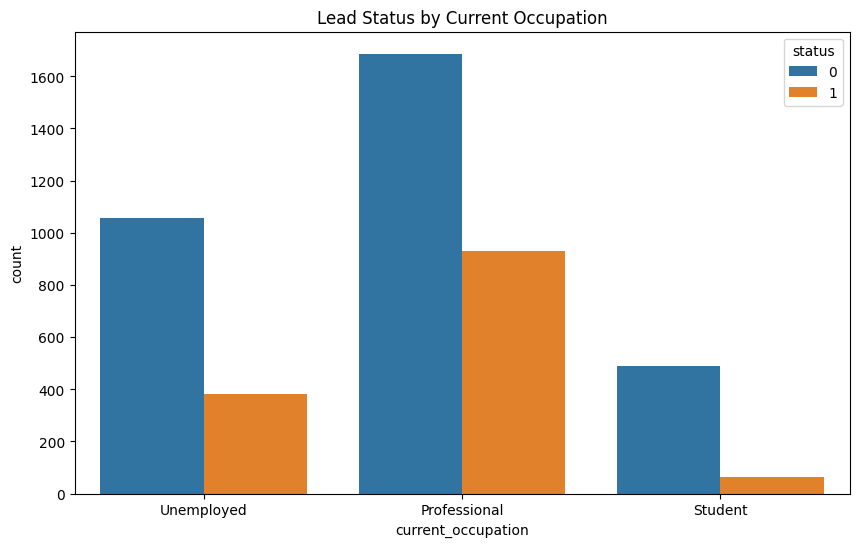

In [10]:
# Question 1: How does current occupation affect lead status?
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='current_occupation', hue='status')
plt.title('Lead Status by Current Occupation')
plt.show()

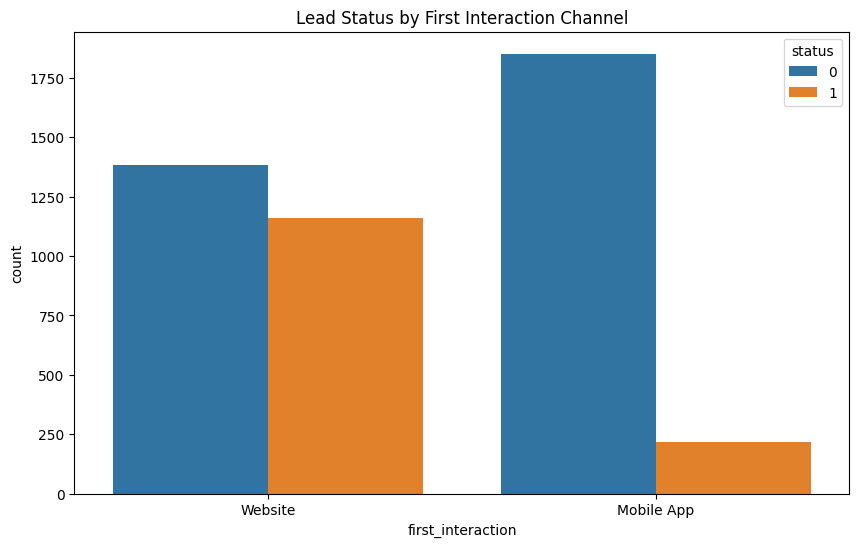

In [11]:
# Question 2: Do the first channels of interaction have an impact on the lead status?
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='first_interaction', hue='status')
plt.title('Lead Status by First Interaction Channel')
plt.show()

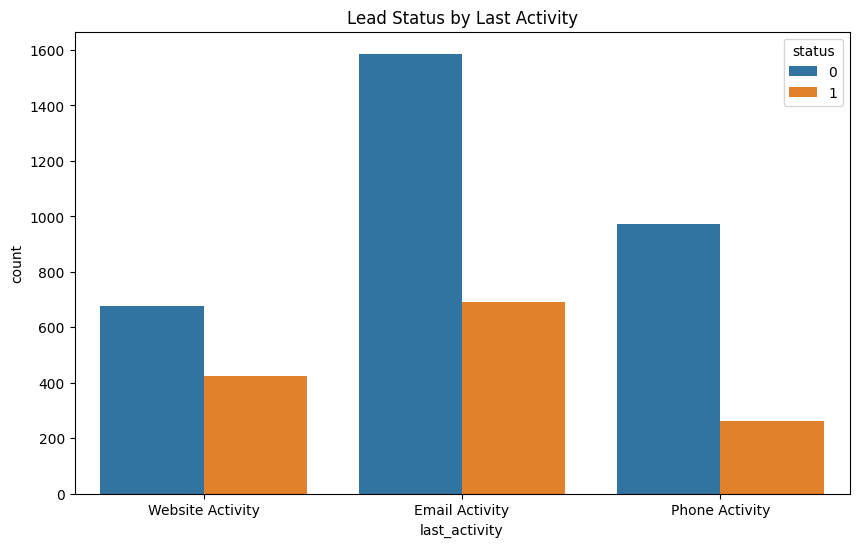

In [12]:
# Question 3: Which way of interaction works best?
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='last_activity', hue='status')
plt.title('Lead Status by Last Activity')
plt.show()

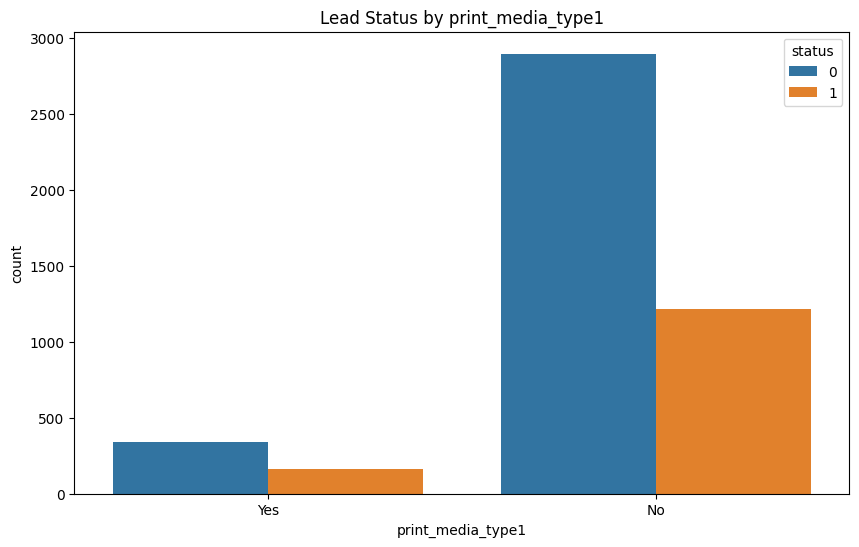

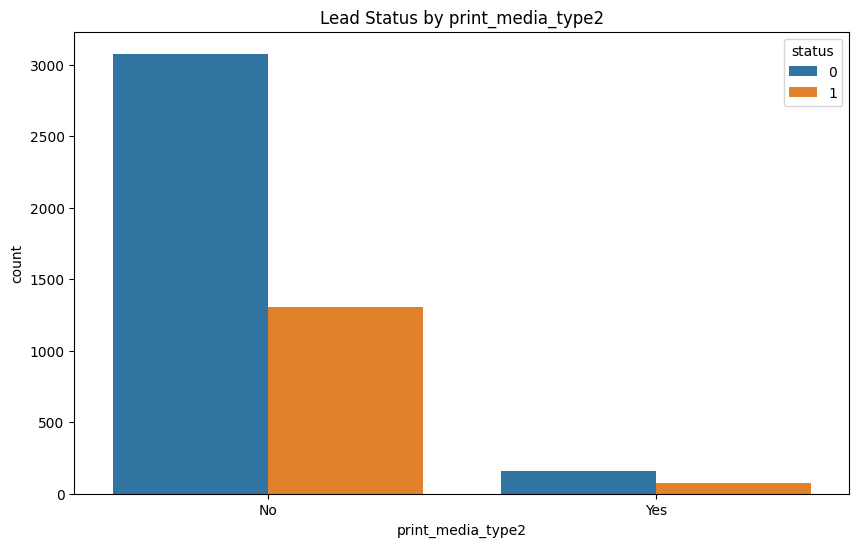

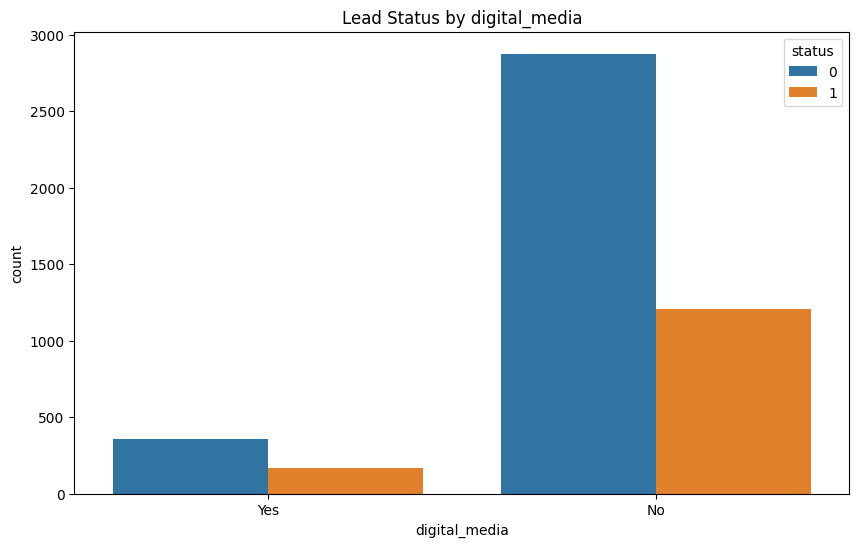

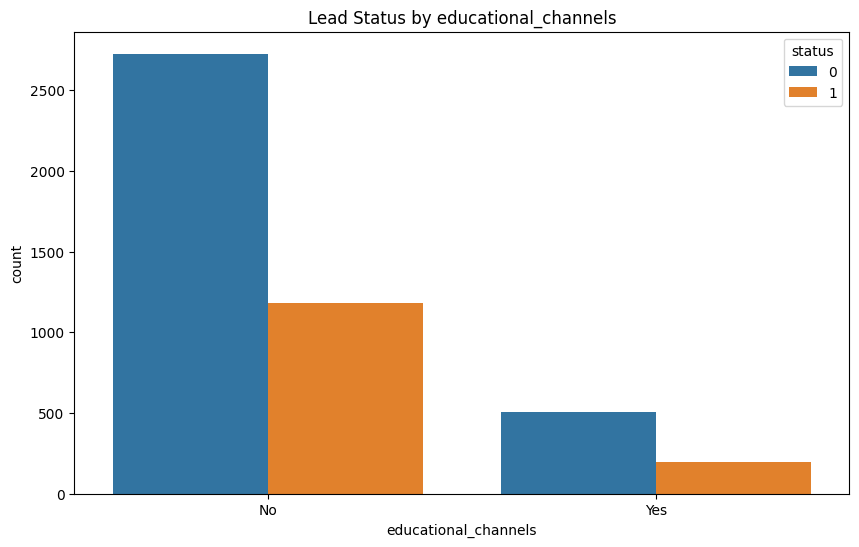

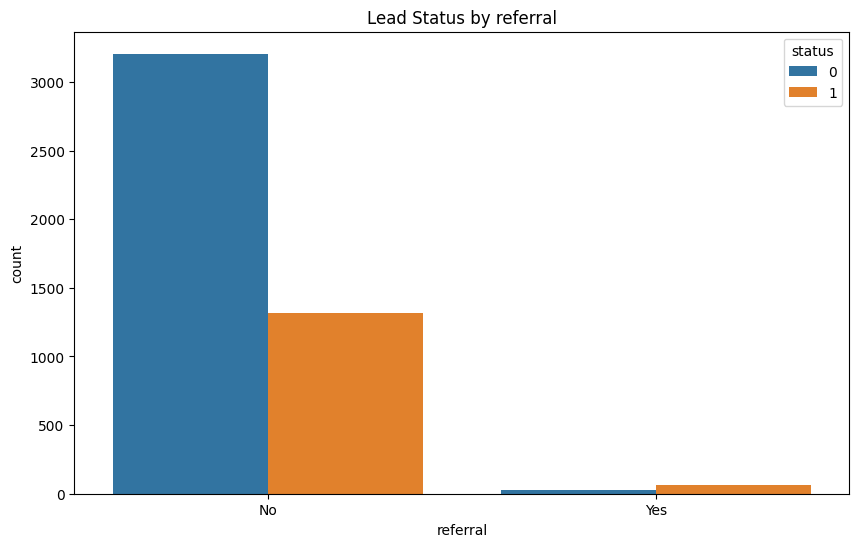

In [13]:
# Question 4: Which of these channels have the highest lead conversion rate?
channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
for channel in channels:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=channel, hue='status')
    plt.title(f'Lead Status by {channel}')
    plt.show()

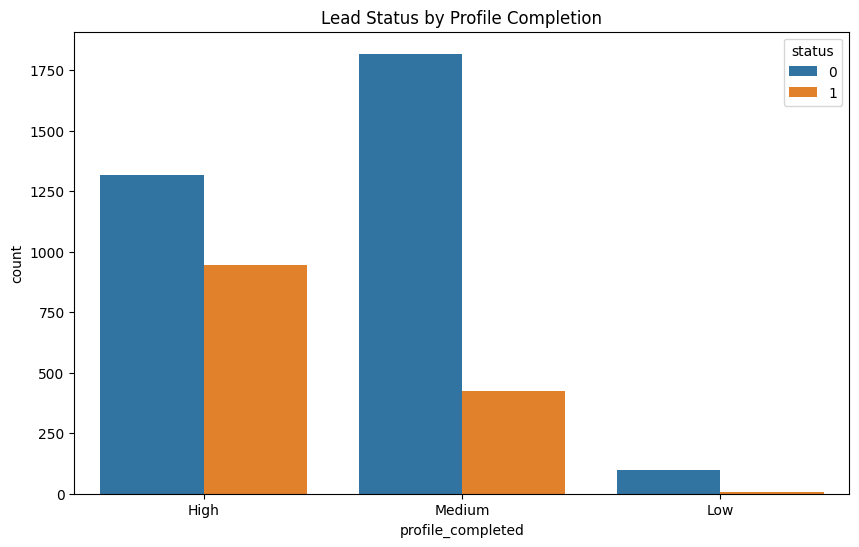

In [14]:
# Question 5: Does having more details about a prospect increase the chances of conversion?
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='profile_completed', hue='status')
plt.title('Lead Status by Profile Completion')
plt.show()

## Answers to Questions:



1.   **Current Occupation**: The occupation of the lead seems to have a noticeable impact on the lead status. Professionals have the highest conversion rate, followed by students and the unemployed.
2.   **First Interaction**: The first interaction channel also appears to influence the lead status. Leads coming from the website have a higher conversion rate compared to those from the mobile app.
3.   **Last Activity**: The last interaction channel also appears to influence the lead status. Leads coming from the website have a higher conversion rate compared to those from the mobile app.
4.   **Channels**: The channels of interaction also appear to influence the lead status. Leads coming from the website have a higher conversion rate compared to those from the mobile app.
5.   **Profile Completion**: Leads with a higher percentage of profile completion are more likely to convert, indicating that more details about a prospect increase the chances of conversion.




## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Missing Value Treatment

In [15]:
# Check for missing values in each column
missing_values = df.isnull().sum()
display("Columns with missing values:", missing_values[missing_values > 0])

'Columns with missing values:'

Series([], dtype: int64)

#### Feature Engineering

In [16]:
# One-hot encode the categorical columns 'current_occupation', 'first_interaction', and 'profile_completed'.
# This converts each category in these columns into new columns with binary values (1 or 0).
# We use drop_first=True to remove the first category column for each original column, reducing multicollinearity.

# Define a function to check if a column exists in the DataFrame
def column_exists(df, col_name):
    return col_name in df.columns

# List of original categorical columns
categorical_cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']

# Check if any of the original categorical columns still exist in the DataFrame
if any(column_exists(df, col) for col in categorical_cols):
    # One-hot encode the categorical columns if they exist
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the DataFrame
df.head()

,ID,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
0,EXT001,57,7,1639,1.861,Yes,No,Yes,No,No,1,0,1,1,0,0,0,1
1,EXT002,56,2,83,0.320,No,No,No,Yes,No,0,0,0,0,0,1,0,1
2,EXT003,52,3,330,0.074,No,No,Yes,No,No,0,0,0,1,0,1,0,1
3,EXT004,53,4,464,2.057,No,No,No,No,No,1,0,1,1,0,0,0,1
4,EXT005,23,4,600,16.914,No,No,No,No,No,0,1,0,1,0,0,0,0


In [17]:
# Define a function to check if a column contains non-numeric values
def contains_non_numeric(df, col_name):
    return not pd.api.types.is_numeric_dtype(df[col_name])

# List of binary columns
binary_cols = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# Check if any of the binary columns contain non-numeric values
if any(contains_non_numeric(df, col) for col in binary_cols):
    # Convert binary fields to 0s and 1s if they contain non-numeric values
    df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'Yes' else 0)

# Display the first few rows of the DataFrame
df.head()

,ID,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
0,EXT001,57,7,1639,1.861,1,0,1,0,0,1,0,1,1,0,0,0,1
1,EXT002,56,2,83,0.320,0,0,0,1,0,0,0,0,0,0,1,0,1
2,EXT003,52,3,330,0.074,0,0,1,0,0,0,0,0,1,0,1,0,1
3,EXT004,53,4,464,2.057,0,0,0,0,0,1,0,1,1,0,0,0,1
4,EXT005,23,4,600,16.914,0,0,0,0,0,0,1,0,1,0,0,0,0


In [18]:
# Create a new feature called 'interaction_time_page_views' by multiplying 'time_spent_on_website' and 'page_views_per_visit'.
# This interaction feature aims to capture the combined effect of the time spent on the website and the number of pages viewed per visit.
# The idea is that leads who spend more time on the website and view more pages might be more likely to convert.

# Check if the interaction feature already exists in the DataFrame
if 'interaction_time_page_views' not in df.columns:
    # Create interaction feature if it doesn't exist
    df['interaction_time_page_views'] = df['time_spent_on_website'] * df['page_views_per_visit']

# Display the first few rows of the DataFrame
df.head()

,ID,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,interaction_time_page_views
0,EXT001,57,7,1639,1.861,1,0,1,0,0,1,0,1,1,0,0,0,1,3050.179
1,EXT002,56,2,83,0.320,0,0,0,1,0,0,0,0,0,0,1,0,1,26.560
2,EXT003,52,3,330,0.074,0,0,1,0,0,0,0,0,1,0,1,0,1,24.420
3,EXT004,53,4,464,2.057,0,0,0,0,0,1,0,1,1,0,0,0,1,954.448
4,EXT005,23,4,600,16.914,0,0,0,0,0,0,1,0,1,0,0,0,0,10148.400


In [19]:
# Create age bins to categorize leads into different age groups.
# We define the bins as [20, 30, 40, 50, 60, np.inf] and the corresponding labels as ['20-29', '30-39', '40-49', '50-59', '60+'].
# The new feature 'age_group' will contain these age categories.
# This can help in understanding how age affects lead conversion rates and allows for more targeted analysis.
# We use right=False to indicate that the bins should be left-closed, meaning the right bin edge is not included in the bin.

bins = [20, 30, 40, 50, 60, np.inf]
labels = ['20-29', '30-39', '40-49', '50-59', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df.head()

,ID,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,interaction_time_page_views,age_group
0,EXT001,57,7,1639,1.861,1,0,1,0,0,1,0,1,1,0,0,0,1,3050.179,50-59
1,EXT002,56,2,83,0.320,0,0,0,1,0,0,0,0,0,0,1,0,1,26.560,50-59
2,EXT003,52,3,330,0.074,0,0,1,0,0,0,0,0,1,0,1,0,1,24.420,50-59
3,EXT004,53,4,464,2.057,0,0,0,0,0,1,0,1,1,0,0,0,1,954.448,50-59
4,EXT005,23,4,600,16.914,0,0,0,0,0,0,1,0,1,0,0,0,0,10148.400,20-29


#### Outlier Detection and Treatment

In [20]:
# List of numerical columns to check for outliers
numerical_columns = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Loop through each numerical column to identify outliers
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]

    # Display the outliers
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in age: 0
Outliers in website_visits: 154
Outliers in time_spent_on_website: 0
Outliers in page_views_per_visit: 257


In [21]:
# Cap and floor outliers to the 1st and 99th percentile
outlier_columns = ['website_visits', 'page_views_per_visit']
for col in outlier_columns:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower_bound, upper_bound)

df.head()

,ID,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,interaction_time_page_views,age_group
0,EXT001,57,7,1639,1.86100,1,0,1,0,0,1,0,1,1,0,0,0,1,3050.179,50-59
1,EXT002,56,2,83,0.32000,0,0,0,1,0,0,0,0,0,0,1,0,1,26.560,50-59
2,EXT003,52,3,330,0.07400,0,0,1,0,0,0,0,0,1,0,1,0,1,24.420,50-59
3,EXT004,53,4,464,2.05700,0,0,0,0,0,1,0,1,1,0,0,0,1,954.448,50-59
4,EXT005,23,4,600,8.71202,0,0,0,0,0,0,1,0,1,0,0,0,0,10148.400,20-29


#### Preparing Data for Modeling

In [22]:
# Selecting the most important features based on domain knowledge and data understanding
selected_features = [
    'age', 'current_occupation_Student', 'current_occupation_Unemployed',
    'first_interaction_Website', 'profile_completed_Low', 'profile_completed_Medium',
    'website_visits', 'time_spent_on_website', 'page_views_per_visit',
    'last_activity_Phone Activity', 'last_activity_Website Activity',
    'interaction_time_page_views', 'digital_media', 'educational_channels', 'referral',
    'print_media_type1', 'print_media_type2'
]

# Create a new DataFrame with only the selected features
df_selected_features = df[selected_features]

In [23]:
# Define X (features) and y (target)
X = df_selected_features  # Features
y = df['status']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (3689, 17)
Test set shape: (923, 17)


In [24]:
# Check for class imbalance in the target variable
print("Class distribution:\n", y_train.value_counts())

Class distribution:
 0    2586
1    1103
Name: status, dtype: int64


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [25]:
# Summary statistics for the selected features
print("Summary Statistics:")
print(df_selected_features.describe())

Summary Statistics:
               age  current_occupation_Student  current_occupation_Unemployed  \
count  4612.000000                 4612.000000                    4612.000000   
mean     46.201214                    0.120338                       0.312446   
std      13.161454                    0.325392                       0.463541   
min      18.000000                    0.000000                       0.000000   
25%      36.000000                    0.000000                       0.000000   
50%      51.000000                    0.000000                       0.000000   
75%      57.000000                    0.000000                       1.000000   
max      63.000000                    1.000000                       1.000000   

       first_interaction_Website  profile_completed_Low  \
count                4612.000000            4612.000000   
mean                    0.551171               0.023200   
std                     0.497429               0.150556   
min           

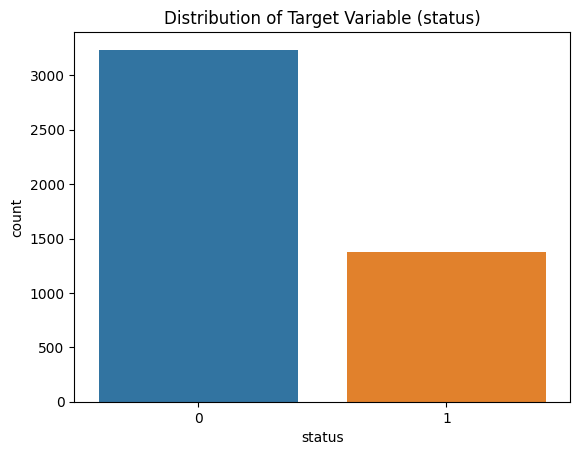

In [26]:
# Plotting the distribution of the target variable
sns.countplot(x='status', data=df)
plt.title('Distribution of Target Variable (status)')
plt.show()

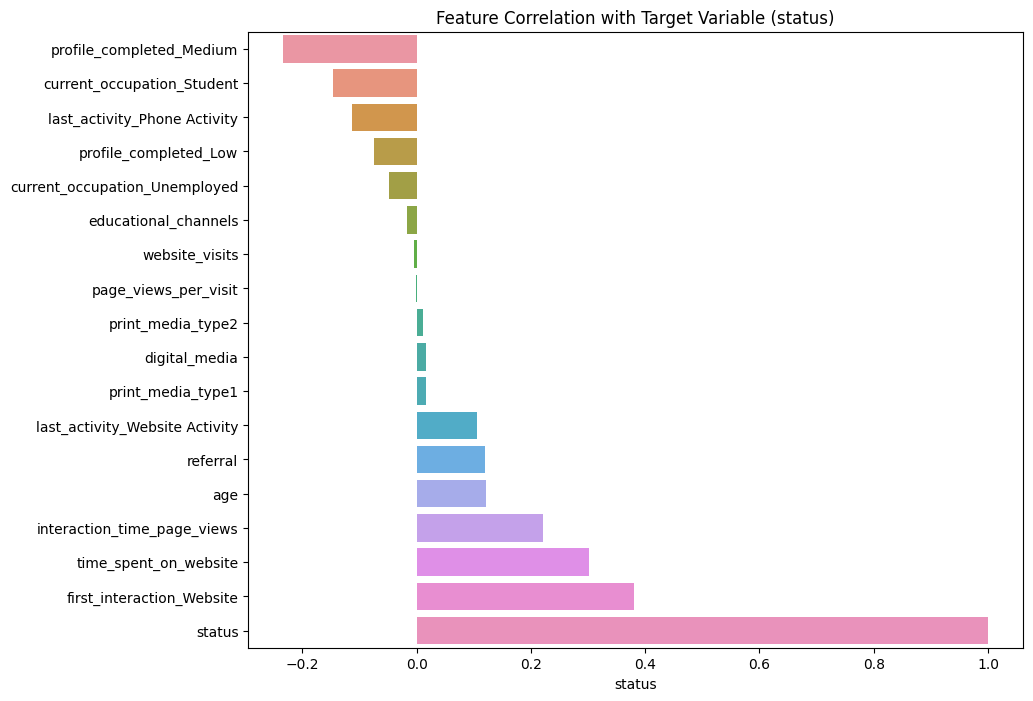

In [27]:
# Calculate correlations with the target variable and sort
# We focus on the correlation with the target variable because it directly informs us about the features
# that have the most influence on the target. This is often the primary concern in predictive modeling.
correlations = df[selected_features + ['status']].corr()['status'].sort_values()

# Plot
# We use a horizontal bar plot for better readability and interpretation.
# Each bar represents the correlation of a feature with the target variable.
# The bars are sorted, making it easier to identify which features are most strongly correlated with the target.
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations, y=correlations.index, orient='h')
plt.title('Feature Correlation with Target Variable (status)')
plt.show()

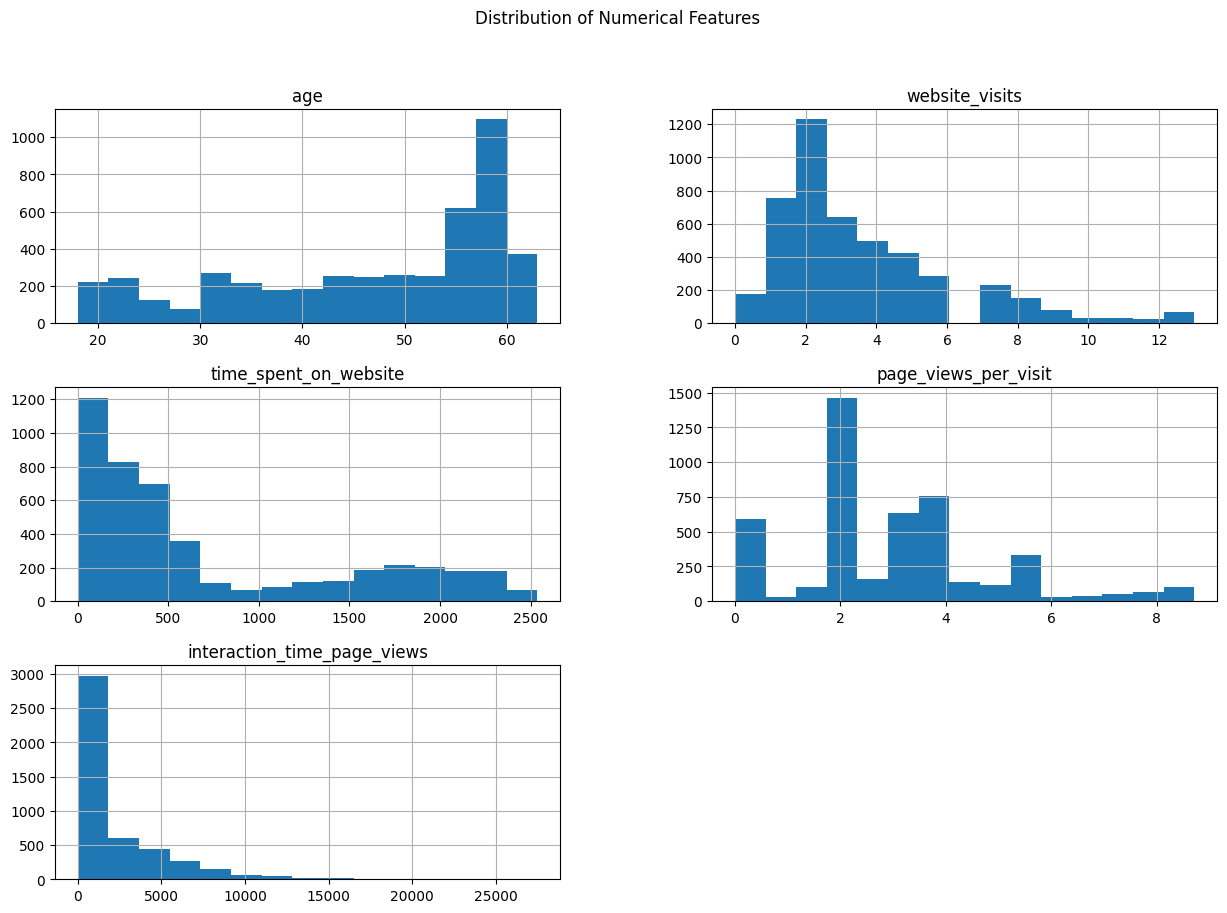

In [28]:
# Distribution of numerical features
numerical_features = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'interaction_time_page_views']
df_selected_features[numerical_features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

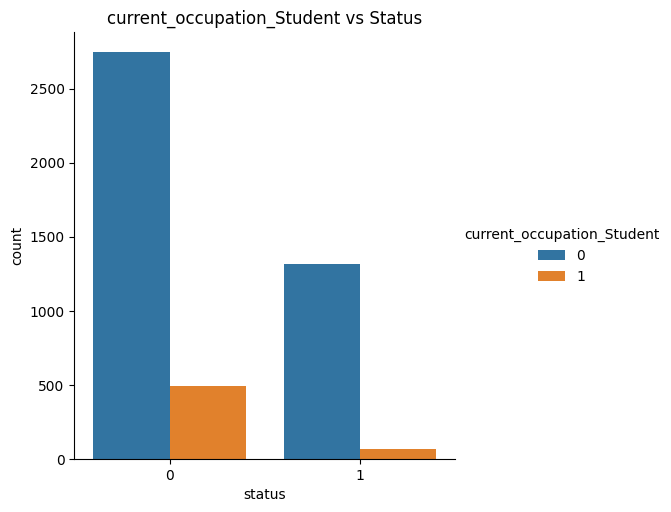

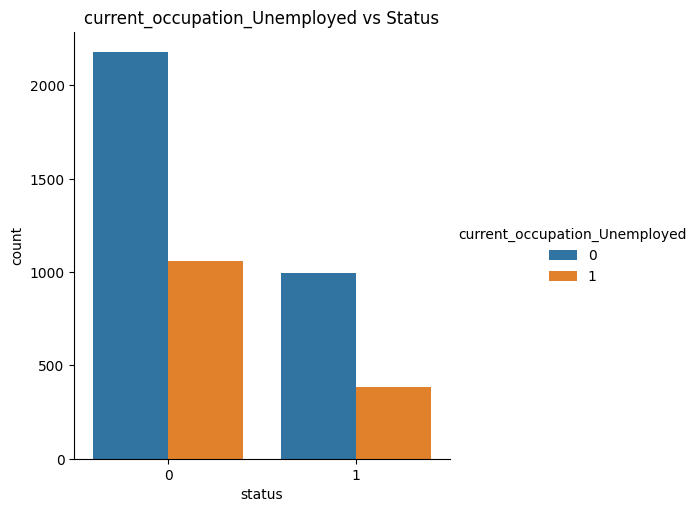

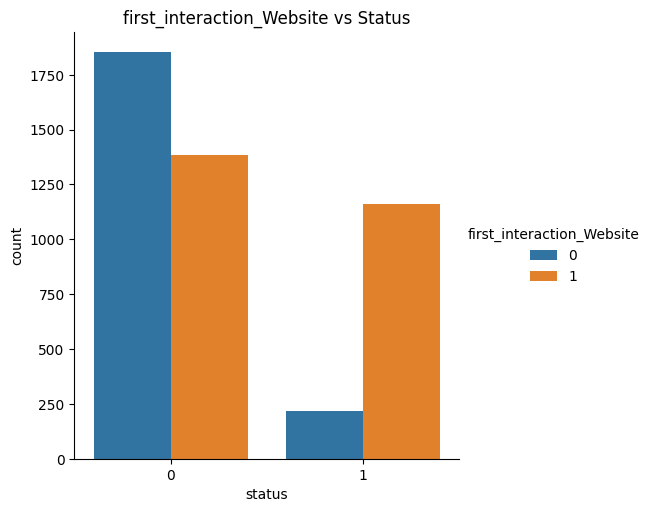

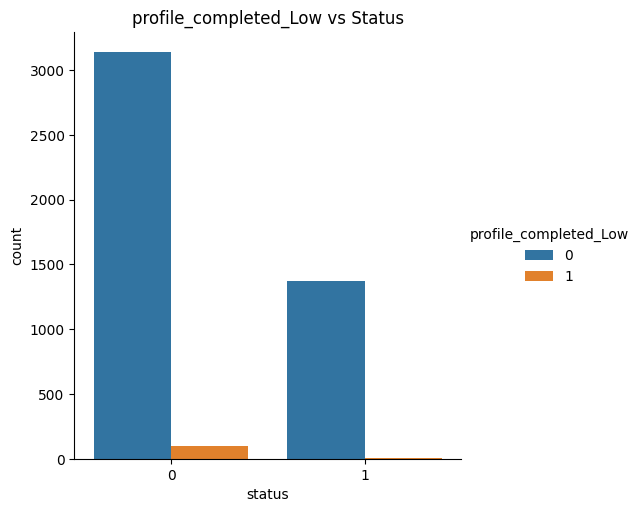

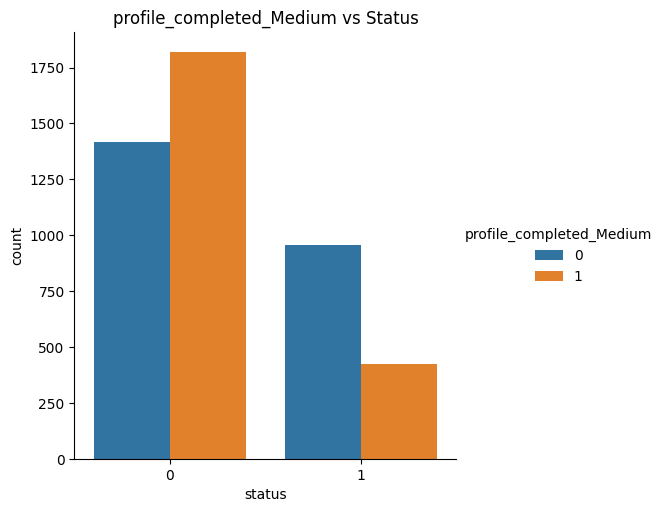

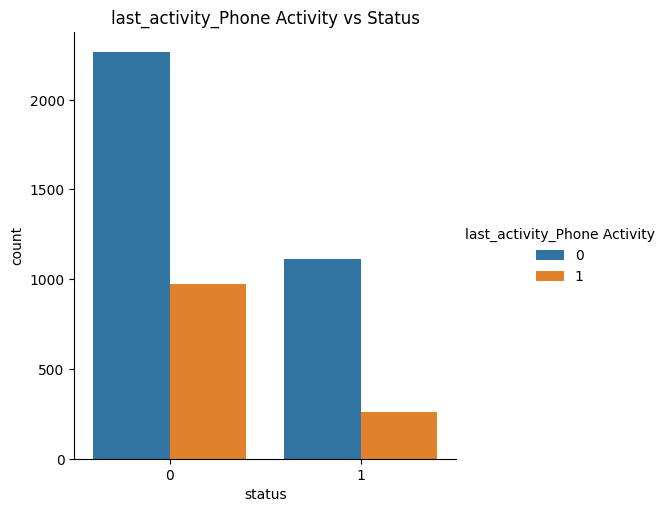

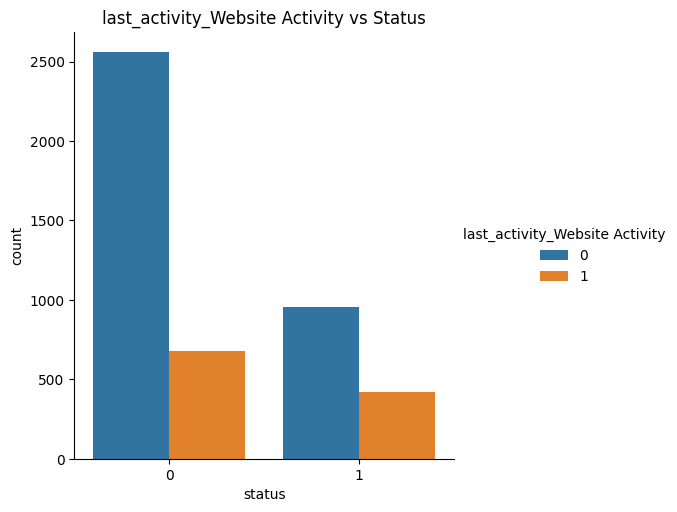

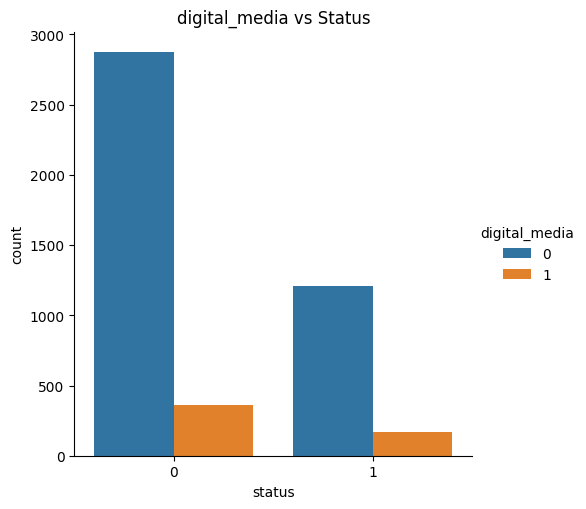

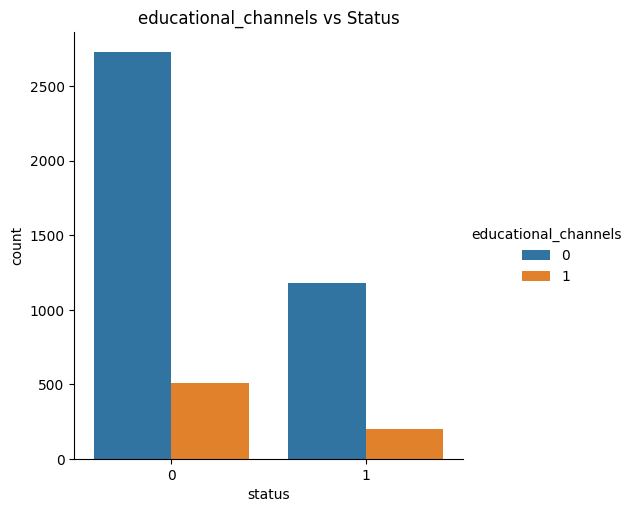

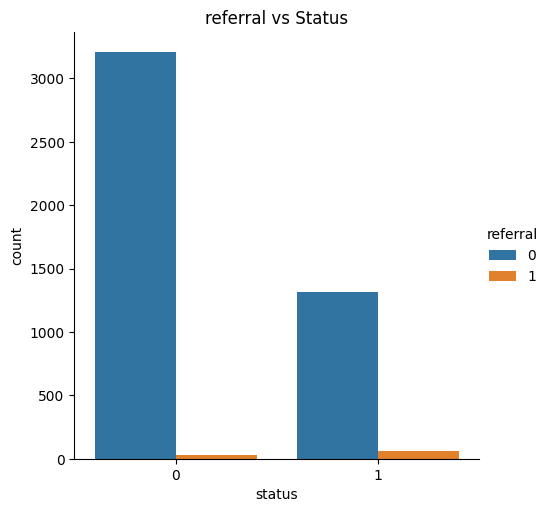

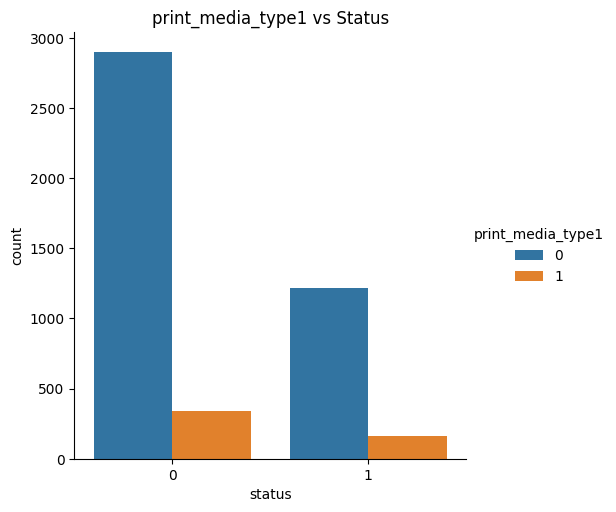

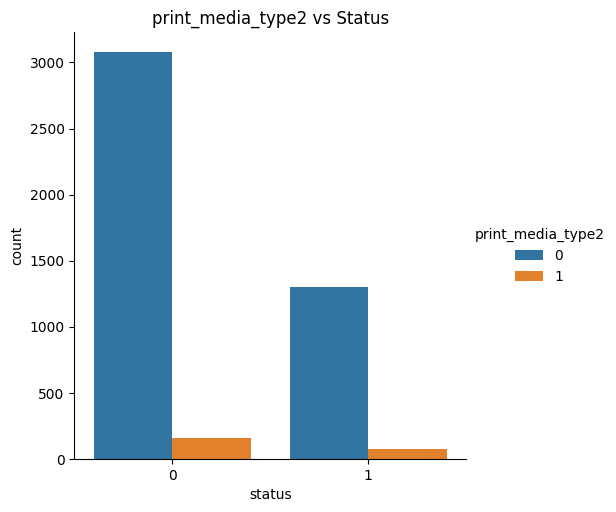

In [29]:
# List of categorical features to plot against the target variable
categorical_features = [
    'current_occupation_Student', 'current_occupation_Unemployed',
    'first_interaction_Website', 'profile_completed_Low', 'profile_completed_Medium',
    'last_activity_Phone Activity', 'last_activity_Website Activity',
    'digital_media', 'educational_channels', 'referral',
    'print_media_type1', 'print_media_type2'
]

# Plotting categorical features against the target variable
for feature in categorical_features:
    sns.catplot(x='status', kind='count', hue=feature, data=df)
    plt.title(f'{feature} vs Status')
    plt.show()

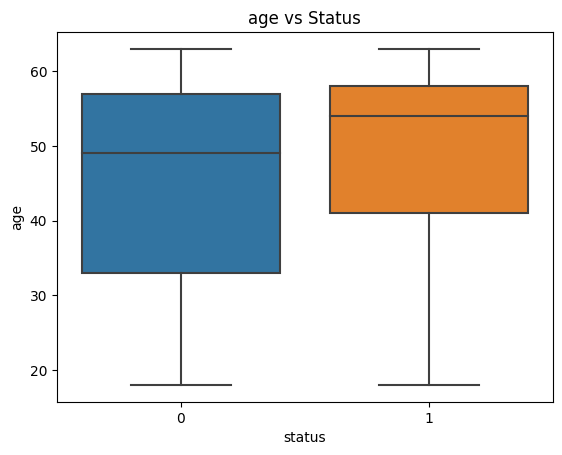

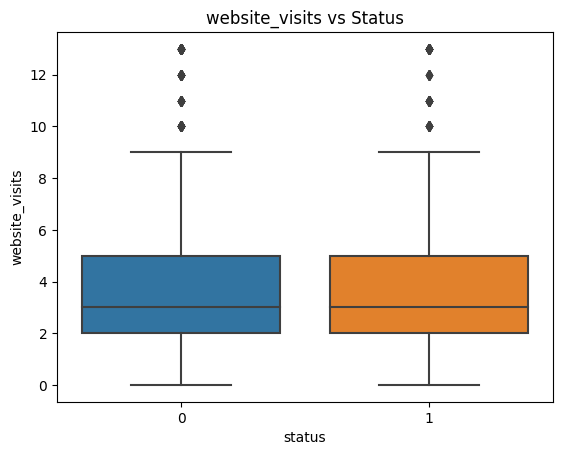

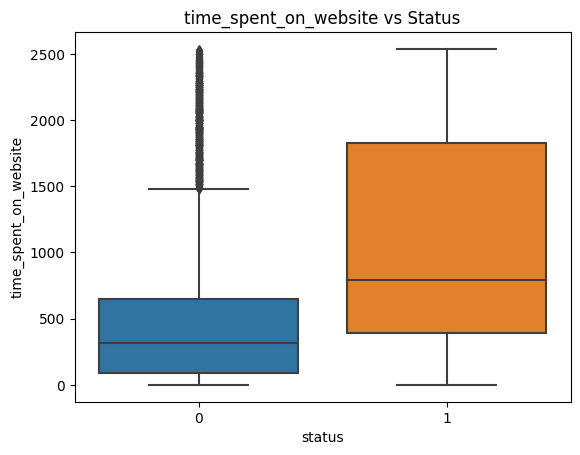

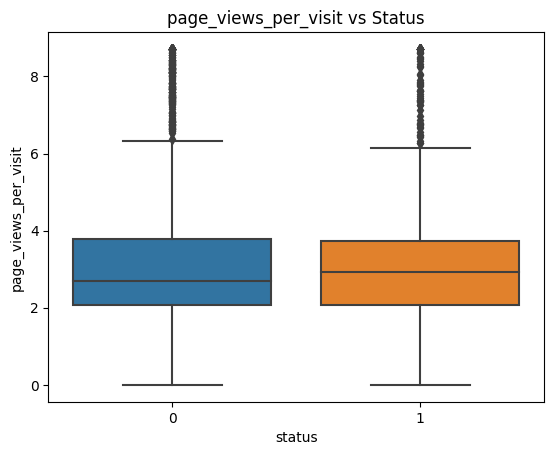

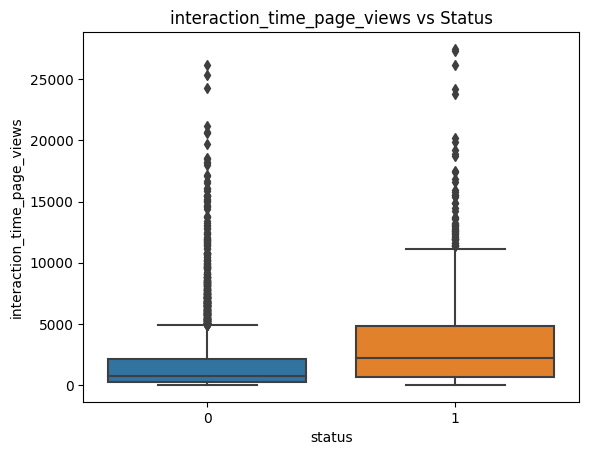

In [30]:
# Plotting numerical features against the target variable
for feature in numerical_features:
    sns.boxplot(x='status', y=feature, data=df)
    plt.title(f'{feature} vs Status')
    plt.show()

## Building a Decision Tree model

In [31]:
# Define X (features) and y (target)
X = df_selected_features  # Features
y = df['status']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (3689, 17)
Test set shape: (923, 17)


In [32]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model using the training data
dt_model.fit(X_train, y_train)

# Display a message to indicate that the model training is complete
print("Decision Tree model training complete.")

Decision Tree model training complete.


In [36]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate the accuracy of the model
test_accuracy = accuracy_score(y_test, y_pred)

# Display the test accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display the classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8072
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       649
           1       0.67      0.68      0.68       274

    accuracy                           0.81       923
   macro avg       0.77      0.77      0.77       923
weighted avg       0.81      0.81      0.81       923



## Do we need to prune the tree?

In [38]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [39]:
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [40]:
# Get the best estimator
best_estimator = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
y_pred_best = best_estimator.predict(X_test)

# Calculate the accuracy of the best estimator
best_accuracy = accuracy_score(y_test, y_pred_best)

# Display the test accuracy
print(f"Pruned Test Accuracy: {best_accuracy:.4f}")

# Display the classification report
print("Pruned Classification Report:")
print(classification_report(y_test, y_pred_best))

Pruned Test Accuracy: 0.8407
Pruned Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       649
           1       0.74      0.71      0.73       274

    accuracy                           0.84       923
   macro avg       0.81      0.80      0.81       923
weighted avg       0.84      0.84      0.84       923



The results after pruning show an improvement in the model's performance:

The overall test accuracy increased from 0.8072 to 0.8407.
The precision, recall, and F1-score for both classes also show improvement or are at least similar to the unpruned model.

## Building a Random Forest model

In [42]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model using the training data
rf_model.fit(X_train, y_train)

# Display a message to indicate that the model training is complete
print("Random Forest model training complete.")

Random Forest model training complete.


In [43]:
# Make predictions on the test set
y_rf_pred = rf_model.predict(X_test)

# Calculate the accuracy of the model
rf_test_accuracy = accuracy_score(y_test, y_rf_pred)

# Display the test accuracy
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.4f}")

# Display the classification report for more detailed evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_rf_pred))

Random Forest Test Accuracy: 0.8613
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.90       649
           1       0.82      0.69      0.75       274

    accuracy                           0.86       923
   macro avg       0.85      0.81      0.83       923
weighted avg       0.86      0.86      0.86       923



The Random Forest model shows even better performance than the pruned Decision Tree model:

The overall test accuracy increased to 0.8613.
The precision, recall, and F1-score for both classes are also strong, with particularly high precision for class 0 (0.88) and class 1 (0.82).

## Do we need to prune the tree?

In [44]:
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [45]:
# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best Parameters: {best_params_rf}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [47]:
# Get the best estimator
best_estimator_rf = grid_search_rf.best_estimator_

# Make predictions on the test set using the best estimator
y_pred_best_rf = best_estimator_rf.predict(X_test)

# Calculate the accuracy of the best estimator
best_accuracy_rf = accuracy_score(y_test, y_pred_best_rf)

# Display the test accuracy
print(f"Pruned Random Forest Test Accuracy: {best_accuracy_rf:.4f}")

# Display the classification report
print("Pruned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

Pruned Random Forest Test Accuracy: 0.8613
Pruned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       649
           1       0.80      0.70      0.75       274

    accuracy                           0.86       923
   macro avg       0.84      0.82      0.83       923
weighted avg       0.86      0.86      0.86       923



The results for the pruned Random Forest model are quite similar to the unpruned version:

1. **Accuracy**: Both the pruned and unpruned Random Forest models have the same test accuracy of 0.8613.
2. **Precision, Recall, and F1-Score**: The metrics are very similar between the two models, with slight variations in precision and recall for class 1.
3. **Model Complexity**: The pruned model is likely to be simpler and more interpretable, although in this case, it did not lead to an improvement in accuracy or other metrics.
4. **Recommendation**: Given that both models perform similarly, the choice between them would depend on the specific needs of the project. If interpretability and simplicity are important, the pruned model may be preferable. Otherwise, the unpruned model can be used for slightly better precision for class 1.

## Actionable Insights and Recommendations

## Actionable Insights:

### General Insights:

1. **Occupation Matters**: Professionals are more likely to convert compared to students and the unemployed.
2. **First Interaction**: Leads coming from the website have a higher conversion rate.
3. **Last Activity**: Email activity is the most effective way of interacting with leads.
4. **Marketing Channels**: Digital media and referrals have higher conversion rates.
5. **Profile Completion**: Higher profile completion rates are correlated with higher conversion rates.

### Model-Specific Insights:

1. **Model Performance**: Both the pruned and unpruned Random Forest models have identical accuracy scores. Therefore, either model could be considered for deployment, depending on the specific project requirements. If interpretability and simplicity are important, the pruned model may be preferable.

2. **Feature Importance**: Features like 'current_occupation', 'first_interaction', and 'last_activity' continue to be strong predictors in both the pruned and unpruned models. These features should be given special attention in future data collection and analysis efforts.


## Recommendations:

### General Recommendations:

1. **Target Professionals**: Tailor marketing campaigns to target professionals more aggressively.
2. **Optimize Website**: Focus on optimizing the website for user engagement and conversion.
3. **Email Engagement**: Prioritize email as a mode of interaction with leads.
4. **Digital and Referral Marketing**: Allocate more resources to digital platforms and referral programs.
5. **Encourage Profile Completion**: Offer incentives to encourage leads to complete their profiles.

### Model-Specific Recommendations:

1. **Deploy Either Random Forest Model**: Given that both the pruned and unpruned Random Forest models have identical accuracy, either could be considered for deployment. If interpretability and simplicity are important, the pruned model may be preferable.

2. **Continuous Monitoring and Updating**: Continuously monitor the model's performance and update it with new data to ensure its reliability.

3. **Feature Engineering**: Consider engineering new features or fine-tuning existing ones based on the feature importance metrics from the model.

4. **Hyperparameter Tuning**: Periodically re-tune the model's hyperparameters to maintain or improve performance. However, be cautious of overfitting, especially if choosing to deploy the unpruned model.

